In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('https://raw.githubusercontent.com/vvlychak/House-Prices/main/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/vvlychak/House-Prices/main/test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:>

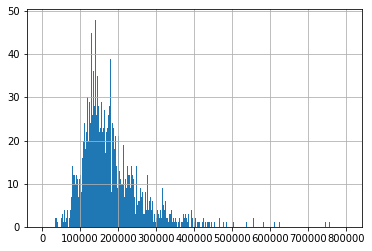

In [8]:
train.SalePrice.hist(bins=300,range=(0,800000))

In [9]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
train['MSZoning'].value_counts(), train['Street'].value_counts(), train['Alley'].value_counts(), \
train['LotShape'].value_counts(), train['LandContour'].value_counts(), train['Utilities'].value_counts(),\
train['LotConfig'].value_counts(), train['LandSlope'].value_counts(), train['Neighborhood'].value_counts(),\
train['Condition1'].value_counts(), train['Condition2'].value_counts(), train['BldgType'].value_counts(),\
train['HouseStyle'].value_counts(), train['RoofStyle'].value_counts(), train['RoofMatl'].value_counts(),\
train['Exterior1st'].value_counts(), train['Exterior2nd'].value_counts(), train['MasVnrType'].value_counts(),\
train['ExterQual'].value_counts(), train['ExterCond'].value_counts(), train['Foundation'].value_counts(),\
train['BsmtQual'].value_counts(), train['BsmtCond'].value_counts(), train['BsmtExposure'].value_counts(),\
train['BsmtFinType1'].value_counts(), train['BsmtFinType2'].value_counts(), train['Heating'].value_counts(),\
train['HeatingQC'].value_counts(), train['CentralAir'].value_counts(), train['Electrical'].value_counts(),\
train['KitchenQual'].value_counts(), train['Functional'].value_counts(), train['FireplaceQu'].value_counts(),\
train['GarageType'].value_counts(), train['GarageFinish'].value_counts(), train['GarageQual'].value_counts(),\
train['GarageCond'].value_counts(), train['PavedDrive'].value_counts(), train['PoolQC'].value_counts(),\
train['Fence'].value_counts(), train['MiscFeature'].value_counts(), train['SaleType'].value_counts(),\
train['SaleCondition'].value_counts()

(RL         1151
 RM          218
 FV           65
 RH           16
 C (all)      10
 Name: MSZoning, dtype: int64,
 Pave    1454
 Grvl       6
 Name: Street, dtype: int64,
 Grvl    50
 Pave    41
 Name: Alley, dtype: int64,
 Reg    925
 IR1    484
 IR2     41
 IR3     10
 Name: LotShape, dtype: int64,
 Lvl    1311
 Bnk      63
 HLS      50
 Low      36
 Name: LandContour, dtype: int64,
 AllPub    1459
 NoSeWa       1
 Name: Utilities, dtype: int64,
 Inside     1052
 Corner      263
 CulDSac      94
 FR2          47
 FR3           4
 Name: LotConfig, dtype: int64,
 Gtl    1382
 Mod      65
 Sev      13
 Name: LandSlope, dtype: int64,
 NAmes      225
 CollgCr    150
 OldTown    113
 Edwards    100
 Somerst     86
 Gilbert     79
 NridgHt     77
 Sawyer      74
 NWAmes      73
 SawyerW     59
 BrkSide     58
 Crawfor     51
 Mitchel     49
 NoRidge     41
 Timber      38
 IDOTRR      37
 ClearCr     28
 StoneBr     25
 SWISU       25
 MeadowV     17
 Blmngtn     17
 BrDale      16
 Veenk

In [11]:
train = train.replace({'MSZoning':{'RL':0, 'RM':1, 'FV':2, 'RH': 3, 'C (all)':4}, 'Street':{'Pave':0, 'Grvl':1}, \
                       'Alley':{'Pave':0, 'Grvl':1}, 'LotShape':{'Reg':0,'IR1':1, 'IR2':2, 'IR3':3}, 'LandContour':{'Lvl':0, 'Bnk':1, 'HLS':2, 'Low':3},\
                    'Utilities':{'AllPub':0, 'NoSeWa':1}, 'LotConfig':{'Inside':0, 'Corner':1, 'CulDSac':2, 'FR2':3, 'FR3':4},\
                    'LandSlope':{'Gtl':0, 'Mod':1, 'Sev':2}, 'Neighborhood':{'NAmes':0, 'CollgCr':1, 'OldTown':2, \
                    'Edwards':3, 'Somerst':4, 'Gilbert':5, 'NridgHt':6, 'Sawyer':7, 'NWAmes':8, 'SawyerW':9, \
                      'BrkSide':10, 'Crawfor':11, 'Mitchel':12, 'NoRidge':13, 'Timber':14, 'IDOTRR':15, \
                        'ClearCr':16, 'StoneBr':17, 'SWISU':18, 'MeadowV':19, 'Blmngtn':20, 'BrDale':21,\
                        'Veenker':22, 'NPkVill':23, 'Blueste':24}, 'Condition1':{'Norm':0, 'Feedr':1, \
                        'Artery':2, 'RRAn':3, 'PosN':4, 'RRAe':5, 'PosA':6, 'RRNn':7, 'RRNe':8},\
                       'Condition2':{'Norm':0, 'Feedr':1, 'Artery':2, 'RRNn':3, 'PosN':4, 'PosA':5, \
                        'RRAn':6, 'RRAe':7}, 'BldgType':{'1Fam':0, 'TwnhsE':1, 'Duplex':2, 'Twnhs':3, \
                        '2fmCon':4}, 'HouseStyle':{'1Story':0, '2Story':1, '1.5Fin':2, 'SLvl':3, 'SFoyer':4, \
                        '1.5Unf':5, '2.5Unf':6, '2.5Fin':7}, 'RoofStyle':{'Gable':0, 'Hip':1, 'Flat':2, \
                        'Gambrel':3, 'Mansard':4, 'Shed':5}, 'RoofMatl':{'CompShg':0, 'Tar&Grv':1, 'WdShngl':2, \
                        'WdShake':3, 'Metal':4, 'Membran':5, 'Roll':6, 'ClyTile':7}, 'Exterior1st':{'VinylSd':0, \
                        'HdBoard':1, 'MetalSd':2, 'Wd Sdng':3, 'Plywood':4, 'CemntBd':5, 'BrkFace':6, 'WdShing':7, \
                        'Stucco':8, 'AsbShng':9, 'BrkComm':10, 'Stone':11, 'AsphShn':12, 'ImStucc':13, 'CBlock':14}, \
                       'Exterior2nd':{'VinylSd':0, 'MetalSd':1, 'HdBoard':2, 'Wd Sdng':3, 'Plywood':4, 'CmentBd':5, 'Wd Shng':6, 'Stucco':7, \
                        'BrkFace':8, 'AsbShng':9, 'ImStucc':10, 'Brk Cmn':11, 'Stone':12, 'AsphShn':13, 'Other':14, \
                        'CBlock':15}, 'MasVnrType':{'None':0, 'BrkFace':1, 'Stone':2, 'BrkCmn':3}, 'ExterQual':\
                       {'TA':0, 'Gd':1, 'Ex':2, 'Fa':3}, 'ExterCond':{'TA':0, 'Gd':1, 'Ex':2, 'Fa':3, 'Po':4}, \
                       'Foundation':{'PConc':0, 'CBlock':1, 'BrkTil':2, 'Slab':3, 'Stone':4, 'Wood':5}, 'BsmtQual':\
                       {'TA':0, 'Gd':1, 'Ex':2, 'Fa':3}, 'BsmtCond':{'TA':0, 'Gd':1, 'Fa':2, 'Po':3}, 'BsmtExposure':\
                       {'No':0, 'Av':1, 'Gd':2, 'Mn':3}, 'BsmtFinType1':{'Unf':0, 'GLQ':1, 'ALQ':2, 'BLQ':3, 'Rec':4, 'LwQ':5}, \
                       'BsmtFinType2':{'Unf':0, 'GLQ':1, 'ALQ':2, 'BLQ':3, 'Rec':4, 'LwQ':5}, 'Heating':\
                       {'GasA':0, 'GasW':1, 'Grav':2, 'Wall':3, 'OthW':4, 'Floor':5}, 'HeatingQC':{'TA':0, 'Gd':1, 'Ex':2, 'Fa':3, 'Po':4},\
                       'CentralAir':{'Y':0, 'N':1}, 'Electrical':{'SBrkr':0, 'FuseA':1, 'FuseF':2, 'FuseP':3, 'Mix':4}, \
                       'KitchenQual':{'TA':0, 'Gd':1, 'Ex':2, 'Fa':3, 'Po':4}, 'Functional':{'Typ':0, 'Min2':1, 'Min1':2, 'Mod':3, 'Maj1':4, \
                        'Maj2':5 , 'Sev':6}, 'FireplaceQu':{'TA':0, 'Gd':1, 'Ex':2, 'Fa':3, 'Po':4}, 'GarageType':\
                       {'Attchd':0, 'Detchd':1, 'BuiltIn':2, 'Basment':3, 'CarPort':4, '2Types':5}, 'GarageFinish':\
                       {'Unf':0, 'RFn':1, 'Fin':2}, 'GarageQual':{'TA':0, 'Gd':1, 'Ex':2, 'Fa':3, 'Po':4}, 'GarageCond':\
                       {'TA':0, 'Gd':1, 'Ex':2, 'Fa':3, 'Po':4}, 'PavedDrive':{'Y':0, 'N':1, 'P':2}, 'PoolQC':\
                       {'TA':0, 'Gd':1, 'Ex':2, 'Fa':3, 'Po':4}, 'Fence':{'MnPrv':0, 'GdPrv':1, 'GdWo':2, 'MnWw':3}, \
                        'MiscFeature':{'Shed':0, 'Gar2':1, 'Othr':2, 'TenC':3}, 'SaleType':{'WD':0, 'New':1, 'COD':2, 'ConLD':3, 'ConLI':4, 'ConLw':5, 'CWD':6, 'Oth':7, 'Con':8}, \
                       'SaleCondition':{'Normal':0, 'Partial':1, 'Abnorml':2, 'Family':3, 'Alloca':4, 'AdjLand':5}})

In [12]:
train.corr().style.background_gradient(cmap='coolwarm').format(precision=2)

<AxesSubplot:>

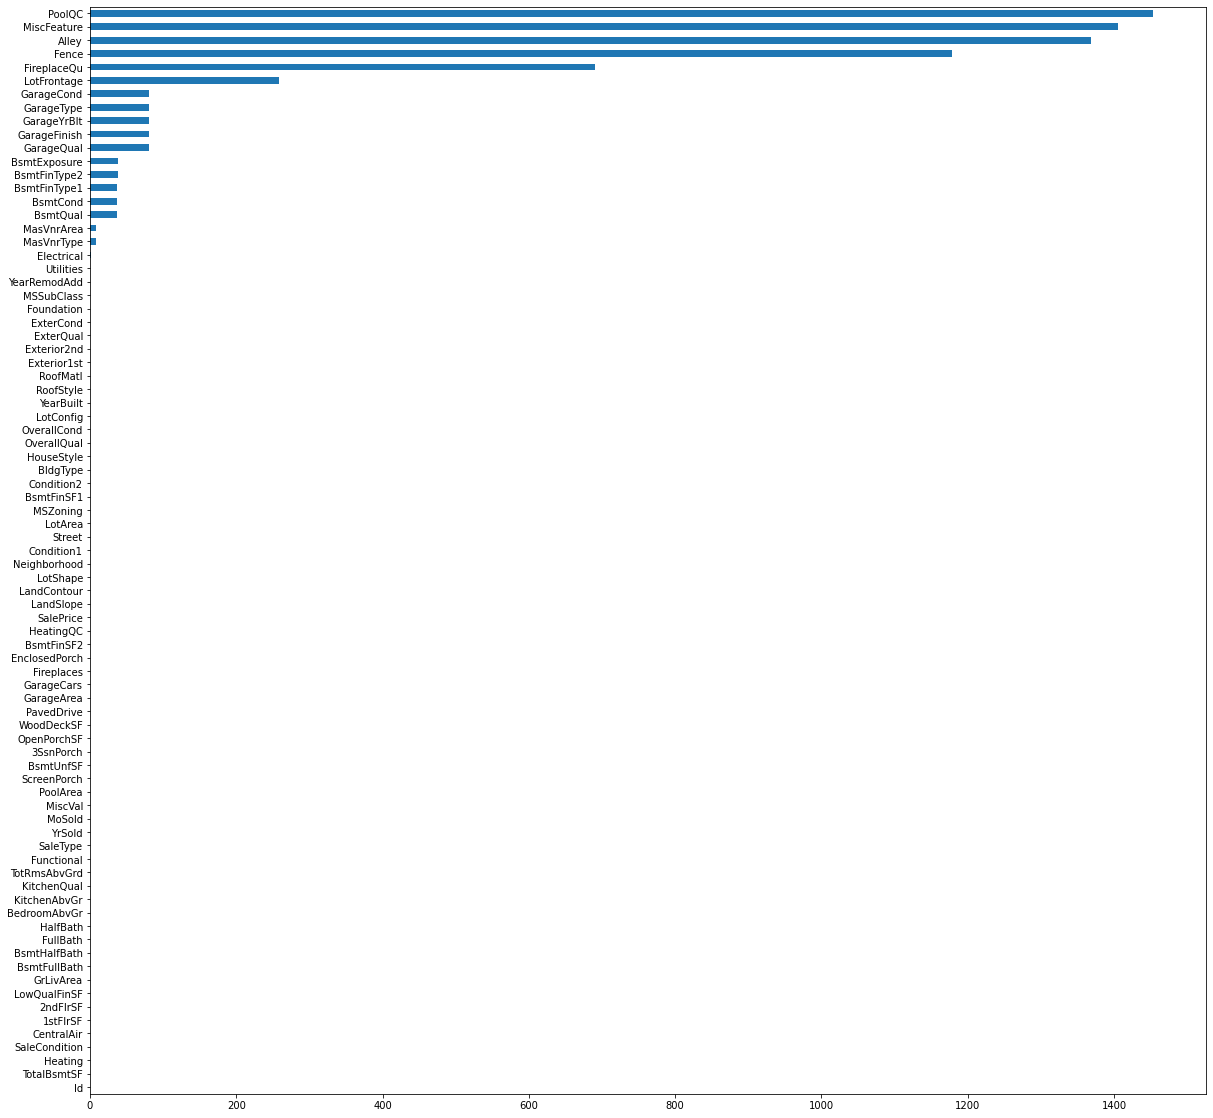

In [13]:
train.isna().sum().sort_values().plot(kind='barh', figsize=(20,20))

In [14]:
train = train.drop(['GarageQual', 'GarageCond', 'GarageType', 'GarageFinish', 'LotFrontage', 'BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtCond', 'BsmtQual', 'MasVnrType', 'MasVnrArea', 'BldgType', 'GarageYrBlt', 'TotRmsAbvGrd', 'GarageArea','Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'BldgType', 'GarageYrBlt', 'TotRmsAbvGrd', 'GarageArea'], axis=1)

In [15]:
train.corr().style.background_gradient(cmap='coolwarm').format(precision=2)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.00,0.28,-0.14,0.02,-0.12,-0.03,-0.02,-0.04,-0.03,0.29,-0.05,0.03,0.36,0.03,-0.06,0.03,0.04,-0.09,-0.01,0.03,0.06,0.03,0.03,-0.03,-0.07,-0.07,-0.14,-0.24,0.03,-0.02,0.10,-0.03,-0.25,0.31,0.05,0.07,0.00,-0.00,0.13,0.18,-0.02,0.28,0.00,0.00,-0.05,-0.04,0.03,-0.01,-0.01,-0.01,-0.04,-0.03,0.01,-0.01,-0.01,-0.02,0.02,0.00,-0.08
MSZoning,0.28,1.00,-0.16,0.12,-0.19,0.01,-0.01,-0.08,-0.02,0.08,-0.03,0.02,0.14,-0.09,-0.02,-0.17,-0.04,-0.05,-0.04,0.06,0.01,0.06,0.07,0.08,-0.17,-0.09,0.00,-0.20,0.03,-0.02,0.21,0.11,-0.25,0.10,0.10,-0.09,-0.13,-0.06,-0.06,-0.03,-0.11,0.09,-0.00,-0.01,-0.21,-0.12,0.17,-0.15,0.08,0.12,-0.05,-0.06,-0.03,-0.02,0.03,-0.00,0.07,0.10,-0.18
LotArea,-0.14,-0.16,1.00,0.20,0.32,0.34,0.01,0.13,0.44,0.07,0.04,0.04,-0.02,0.11,-0.01,0.01,0.01,0.11,0.18,0.07,0.07,0.04,-0.02,-0.00,0.21,0.11,-0.00,0.26,0.02,-0.01,-0.05,-0.05,0.30,0.05,0.00,0.26,0.16,0.05,0.13,0.01,0.12,-0.02,0.03,0.03,0.27,0.15,-0.00,0.17,0.08,-0.02,0.02,0.04,0.08,0.04,0.00,-0.01,-0.01,-0.02,0.26
Street,0.02,0.12,0.20,1.00,0.01,0.10,-0.00,-0.01,0.18,0.06,0.05,-0.01,0.01,-0.06,-0.04,-0.02,-0.07,0.01,-0.01,0.01,0.00,0.11,0.00,0.02,0.02,0.04,-0.04,-0.01,-0.01,-0.05,0.07,0.01,-0.01,-0.05,-0.01,-0.04,0.05,-0.02,-0.05,-0.03,-0.03,-0.01,-0.01,-0.02,0.01,0.02,0.01,0.02,0.01,-0.02,-0.01,0.03,-0.00,0.02,-0.00,0.03,0.02,0.03,-0.04
LotShape,-0.12,-0.19,0.32,0.01,1.00,0.20,0.03,0.28,0.14,0.04,0.08,0.04,-0.05,0.20,-0.03,0.23,0.18,0.01,0.10,-0.10,-0.07,0.17,-0.05,-0.15,0.16,0.06,0.01,0.20,-0.04,0.10,-0.10,-0.09,0.19,0.09,-0.01,0.21,0.06,0.06,0.18,0.12,0.06,-0.09,0.10,-0.03,0.20,0.19,-0.10,0.16,0.09,-0.10,0.03,0.07,0.05,0.03,0.03,-0.04,-0.00,-0.03,0.27
LandContour,-0.03,0.01,0.34,0.10,0.20,1.00,-0.01,0.01,0.61,0.22,-0.02,0.02,-0.01,-0.00,-0.01,-0.05,-0.03,0.09,0.17,0.05,0.03,0.06,0.02,0.02,0.11,0.02,-0.06,0.06,-0.02,-0.02,0.03,0.04,0.07,-0.01,0.02,0.05,0.09,0.03,-0.03,-0.02,-0.04,0.02,0.06,0.03,0.09,0.03,0.08,0.09,-0.04,0.00,0.05,0.02,-0.01,-0.01,0.05,-0.03,-0.02,0.03,0.07
Utilities,-0.02,-0.01,0.01,-0.00,0.03,-0.01,1.00,0.05,-0.01,0.03,-0.01,-0.00,0.04,-0.00,0.01,-0.01,-0.03,-0.01,-0.00,-0.01,-0.00,-0.02,-0.01,0.01,-0.02,0.05,-0.01,-0.01,-0.00,-0.01,-0.01,0.06,0.01,-0.02,-0.00,-0.01,-0.02,0.10,-0.03,-0.02,0.00,-0.01,0.01,-0.01,0.02,0.01,-0.01,-0.02,0.03,-0.01,-0.00,0.10,-0.00,-0.00,-0.05,0.02,0.06,0.06,-0.01
LotConfig,-0.04,-0.08,0.13,-0.01,0.28,0.01,0.05,1.00,0.01,0.01,0.09,-0.00,0.00,0.06,0.01,0.08,0.08,0.06,0.07,-0.06,-0.02,0.03,-0.01,-0.05,0.07,0.01,-0.03,0.04,-0.02,0.03,-0.06,-0.07,0.05,0.03,-0.02,0.06,0.03,0.04,0.06,0.04,0.04,-0.03,-0.00,-0.02,0.04,0.10,-0.08,0.06,0.06,-0.02,0.06,-0.02,0.03,0.03,-0.02,0.01,0.01,-0.01,0.09
LandSlope,-0.03,-0.02,0.44,0.18,0.14,0.61,-0.01,0.01,1.00,0.13,-0.02,-0.00,-0.00,-0.07,0.01,-0.07,-0.06,0.11,0.19,0.10,0.08,0.00,0.01,0.05,0.11,0.09,-0.12,0.03,0.00,-0.02,0.01,-0.00,0.07,-0.01,0.01,0.04,0.12,0.07,-0.05,0.00,-0.05,-0.04,0.03,0.09,0.12,-0.00,0.02,0.10,-0.03,-0.01,0.01,0.05,-0.02,-0.00,0.01,-0.00,-0.06,0.03,0.05
Neighborhood,0.29,0.08,0.07,0.06,0.04,0.22,0.03,0.01,0.13,1.00,-0.04,-0.01,0.08,0.10,-0.02,0.02,0.01,0.00,0.03,0.08,0.16,0.07,0.04,-0.02,0.06,0.01,-0.03,0.04,-0.04,-0.03,0.01,-0.02,0.04,0.10,0.08,0.12,0.03,0.01,0.09,0.09,-0.06,-0.06,0.08,0.00,0.17,0.04,0.05,0.13,-0.01,0.04,-0.01,0.03,0.00,-0.03,-0.00,-0.00,-0.02,0.01,0.13


<AxesSubplot:>

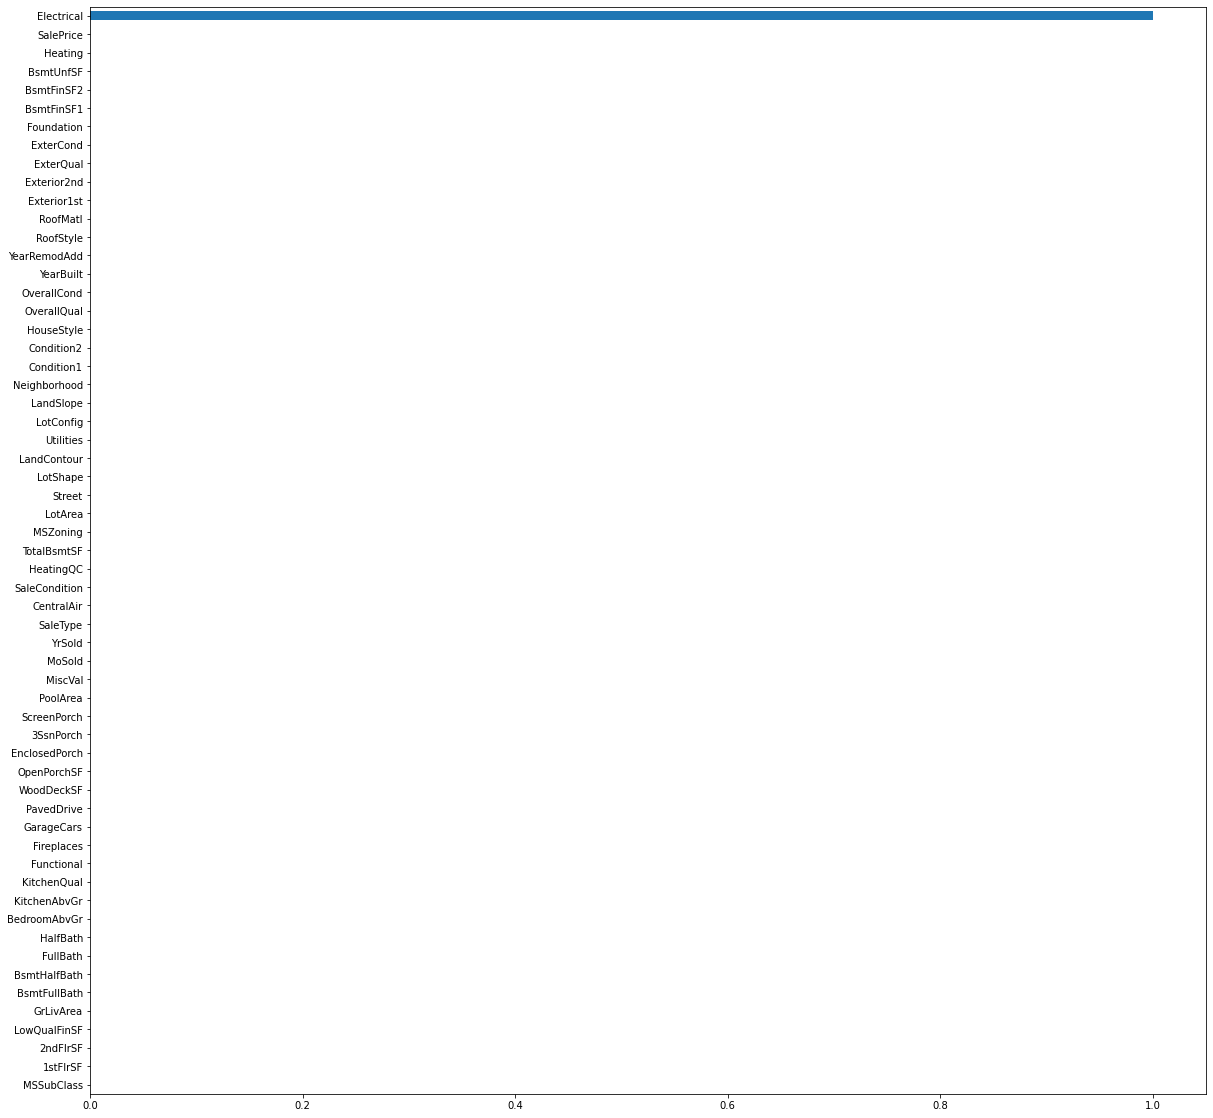

In [16]:
train.isna().sum().sort_values().plot(kind='barh', figsize=(20,20))

In [17]:
train['Electrical'].describe()

count    1459.000000
mean        0.110350
std         0.394782
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: Electrical, dtype: float64

In [18]:
train['Electrical'].isnull().sum()

1

In [19]:
train['Electrical'].value_counts()

0.0    1334
1.0      94
2.0      27
3.0       3
4.0       1
Name: Electrical, dtype: int64

In [20]:
train = train.fillna({'Electrical': 0})

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   int64  
 4   LotShape       1460 non-null   int64  
 5   LandContour    1460 non-null   int64  
 6   Utilities      1460 non-null   int64  
 7   LotConfig      1460 non-null   int64  
 8   LandSlope      1460 non-null   int64  
 9   Neighborhood   1460 non-null   int64  
 10  Condition1     1460 non-null   int64  
 11  Condition2     1460 non-null   int64  
 12  HouseStyle     1460 non-null   int64  
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   int64  
 18  RoofMatl

In [22]:
X = train.drop(['SalePrice'], axis=1)
y = train.SalePrice

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [24]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [25]:
linreg.score(X_test, y_test)

0.7977278329190647

In [26]:
test = test.drop(['GarageQual', 'GarageCond', 'GarageType', 'GarageFinish', 'LotFrontage', 'BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtCond', 'BsmtQual', 'MasVnrType', 'MasVnrArea', 'BldgType', 'GarageYrBlt', 'TotRmsAbvGrd', 'GarageArea','Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'BldgType', 'GarageYrBlt', 'TotRmsAbvGrd', 'GarageArea'], axis=1)

In [27]:
test = test.replace({'MSZoning':{'RL':0, 'RM':1, 'FV':2, 'RH': 3, 'C (all)':4}, 'Street':{'Pave':0, 'Grvl':1}, \
                       'Alley':{'Pave':0, 'Grvl':1}, 'LotShape':{'Reg':0,'IR1':1, 'IR2':2, 'IR3':3}, 'LandContour':{'Lvl':0, 'Bnk':1, 'HLS':2, 'Low':3},\
                    'Utilities':{'AllPub':0, 'NoSeWa':1}, 'LotConfig':{'Inside':0, 'Corner':1, 'CulDSac':2, 'FR2':3, 'FR3':4},\
                    'LandSlope':{'Gtl':0, 'Mod':1, 'Sev':2}, 'Neighborhood':{'NAmes':0, 'CollgCr':1, 'OldTown':2, \
                    'Edwards':3, 'Somerst':4, 'Gilbert':5, 'NridgHt':6, 'Sawyer':7, 'NWAmes':8, 'SawyerW':9, \
                      'BrkSide':10, 'Crawfor':11, 'Mitchel':12, 'NoRidge':13, 'Timber':14, 'IDOTRR':15, \
                        'ClearCr':16, 'StoneBr':17, 'SWISU':18, 'MeadowV':19, 'Blmngtn':20, 'BrDale':21,\
                        'Veenker':22, 'NPkVill':23, 'Blueste':24}, 'Condition1':{'Norm':0, 'Feedr':1, \
                        'Artery':2, 'RRAn':3, 'PosN':4, 'RRAe':5, 'PosA':6, 'RRNn':7, 'RRNe':8},\
                       'Condition2':{'Norm':0, 'Feedr':1, 'Artery':2, 'RRNn':3, 'PosN':4, 'PosA':5, \
                        'RRAn':6, 'RRAe':7}, 'BldgType':{'1Fam':0, 'TwnhsE':1, 'Duplex':2, 'Twnhs':3, \
                        '2fmCon':4}, 'HouseStyle':{'1Story':0, '2Story':1, '1.5Fin':2, 'SLvl':3, 'SFoyer':4, \
                        '1.5Unf':5, '2.5Unf':6, '2.5Fin':7}, 'RoofStyle':{'Gable':0, 'Hip':1, 'Flat':2, \
                        'Gambrel':3, 'Mansard':4, 'Shed':5}, 'RoofMatl':{'CompShg':0, 'Tar&Grv':1, 'WdShngl':2, \
                        'WdShake':3, 'Metal':4, 'Membran':5, 'Roll':6, 'ClyTile':7}, 'Exterior1st':{'VinylSd':0, \
                        'HdBoard':1, 'MetalSd':2, 'Wd Sdng':3, 'Plywood':4, 'CemntBd':5, 'BrkFace':6, 'WdShing':7, \
                        'Stucco':8, 'AsbShng':9, 'BrkComm':10, 'Stone':11, 'AsphShn':12, 'ImStucc':13, 'CBlock':14}, \
                       'Exterior2nd':{'VinylSd':0, 'MetalSd':1, 'HdBoard':2, 'Wd Sdng':3, 'Plywood':4, 'CmentBd':5, 'Wd Shng':6, 'Stucco':7, \
                        'BrkFace':8, 'AsbShng':9, 'ImStucc':10, 'Brk Cmn':11, 'Stone':12, 'AsphShn':13, 'Other':14, \
                        'CBlock':15}, 'MasVnrType':{'None':0, 'BrkFace':1, 'Stone':2, 'BrkCmn':3}, 'ExterQual':\
                       {'TA':0, 'Gd':1, 'Ex':2, 'Fa':3}, 'ExterCond':{'TA':0, 'Gd':1, 'Ex':2, 'Fa':3, 'Po':4}, \
                       'Foundation':{'PConc':0, 'CBlock':1, 'BrkTil':2, 'Slab':3, 'Stone':4, 'Wood':5}, 'BsmtQual':\
                       {'TA':0, 'Gd':1, 'Ex':2, 'Fa':3}, 'BsmtCond':{'TA':0, 'Gd':1, 'Fa':2, 'Po':3}, 'BsmtExposure':\
                       {'No':0, 'Av':1, 'Gd':2, 'Mn':3}, 'BsmtFinType1':{'Unf':0, 'GLQ':1, 'ALQ':2, 'BLQ':3, 'Rec':4, 'LwQ':5}, \
                       'BsmtFinType2':{'Unf':0, 'GLQ':1, 'ALQ':2, 'BLQ':3, 'Rec':4, 'LwQ':5}, 'Heating':\
                       {'GasA':0, 'GasW':1, 'Grav':2, 'Wall':3, 'OthW':4, 'Floor':5}, 'HeatingQC':{'TA':0, 'Gd':1, 'Ex':2, 'Fa':3, 'Po':4},\
                       'CentralAir':{'Y':0, 'N':1}, 'Electrical':{'SBrkr':0, 'FuseA':1, 'FuseF':2, 'FuseP':3, 'Mix':4}, \
                       'KitchenQual':{'TA':0, 'Gd':1, 'Ex':2, 'Fa':3, 'Po':4}, 'Functional':{'Typ':0, 'Min2':1, 'Min1':2, 'Mod':3, 'Maj1':4, \
                        'Maj2':5 , 'Sev':6}, 'FireplaceQu':{'TA':0, 'Gd':1, 'Ex':2, 'Fa':3, 'Po':4}, 'GarageType':\
                       {'Attchd':0, 'Detchd':1, 'BuiltIn':2, 'Basment':3, 'CarPort':4, '2Types':5}, 'GarageFinish':\
                       {'Unf':0, 'RFn':1, 'Fin':2}, 'GarageQual':{'TA':0, 'Gd':1, 'Ex':2, 'Fa':3, 'Po':4}, 'GarageCond':\
                       {'TA':0, 'Gd':1, 'Ex':2, 'Fa':3, 'Po':4}, 'PavedDrive':{'Y':0, 'N':1, 'P':2}, 'PoolQC':\
                       {'TA':0, 'Gd':1, 'Ex':2, 'Fa':3, 'Po':4}, 'Fence':{'MnPrv':0, 'GdPrv':1, 'GdWo':2, 'MnWw':3}, \
                        'MiscFeature':{'Shed':0, 'Gar2':1, 'Othr':2, 'TenC':3}, 'SaleType':{'WD':0, 'New':1, 'COD':2, 'ConLD':3, 'ConLI':4, 'ConLw':5, 'CWD':6, 'Oth':7, 'Con':8}, \
                       'SaleCondition':{'Normal':0, 'Partial':1, 'Abnorml':2, 'Family':3, 'Alloca':4, 'AdjLand':5}})

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   float64
 2   LotArea        1459 non-null   int64  
 3   Street         1459 non-null   int64  
 4   LotShape       1459 non-null   int64  
 5   LandContour    1459 non-null   int64  
 6   Utilities      1457 non-null   float64
 7   LotConfig      1459 non-null   int64  
 8   LandSlope      1459 non-null   int64  
 9   Neighborhood   1459 non-null   int64  
 10  Condition1     1459 non-null   int64  
 11  Condition2     1459 non-null   int64  
 12  HouseStyle     1459 non-null   int64  
 13  OverallQual    1459 non-null   int64  
 14  OverallCond    1459 non-null   int64  
 15  YearBuilt      1459 non-null   int64  
 16  YearRemodAdd   1459 non-null   int64  
 17  RoofStyle      1459 non-null   int64  
 18  RoofMatl

In [29]:
test.isnull().sum()

MSSubClass       0
MSZoning         4
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        2
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      1
Exterior2nd      1
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     2
BsmtHalfBath     2
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      1
Functional       2
Fireplaces       0
GarageCars       1
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea    

In [30]:
test['MSZoning'].value_counts(), test['Electrical'].value_counts(), test['Utilities'].value_counts(), test['Exterior1st'].value_counts(), test['BsmtFinSF1'].value_counts(), \
test['BsmtFinSF2'].value_counts(), test['BsmtUnfSF'].value_counts(), test['TotalBsmtSF'].value_counts(), test['BsmtFullBath'].value_counts(), test['BsmtHalfBath'].value_counts(),\
test['KitchenQual'].value_counts(), test['Functional'].value_counts(), test['GarageCars'].value_counts(), test['SaleType'].value_counts()

(0.0    1114
 1.0     242
 2.0      74
 4.0      15
 3.0      10
 Name: MSZoning, dtype: int64,
 0    1337
 1      94
 2      23
 3       5
 Name: Electrical, dtype: int64,
 0.0    1457
 Name: Utilities, dtype: int64,
 0.0     510
 2.0     230
 1.0     220
 3.0     205
 4.0     113
 5.0      65
 6.0      37
 7.0      30
 9.0      24
 8.0      18
 10.0      4
 12.0      1
 14.0      1
 Name: Exterior1st, dtype: int64,
 0.0       462
 24.0       15
 276.0       6
 602.0       6
 300.0       5
          ... 
 1337.0      1
 656.0       1
 706.0       1
 496.0       1
 337.0       1
 Name: BsmtFinSF1, Length: 669, dtype: int64,
 0.0      1278
 483.0       3
 162.0       3
 294.0       3
 144.0       2
          ... 
 110.0       1
 186.0       1
 449.0       1
 48.0        1
 344.0       1
 Name: BsmtFinSF2, Length: 161, dtype: int64,
 0.0       123
 384.0      11
 624.0       8
 738.0       7
 100.0       7
          ... 
 36.0        1
 892.0       1
 747.0       1
 1216.0      1
 1503.0

In [31]:
test = test.fillna(0)

In [32]:
result = pd.DataFrame()
result['Id'] = pd.read_csv('https://raw.githubusercontent.com/vvlychak/House-Prices/main/test.csv')['Id']
result['SalePrice'] = linreg.predict(test)

In [33]:
#result.to_csv('./submission.csv', index=False)